In [1]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
 

In [4]:
# Mengimpor datasetnya
dataset = pd.read_excel('gabungan april_juni.xlsx')
X = dataset.iloc[:, 2:1090].values
y = dataset.iloc[:, 0:1].values
dataset

,wavelength,Unnamed: 1,400,400.552,401.104,401.656,402.208,402.76,403.312,403.864,...,995.056000000023,995.608000000023,996.160000000023,996.712000000023,997.264000000023,997.816000000023,998.368000000023,998.920000000023,999.472000000023,1000.02400000002
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F0S1depan,Mentah,1.980159,1.873677,1.662698,2.007275,1.842593,1.638558,1.364418,1.753307,...,1.644448,1.676756,2.236484,2.384815,1.869747,1.575220,1.651764,2.265046,2.433914,2.284255
2,F0S1belakang,Mentah,2.129630,2.486772,1.646825,2.471781,1.486772,1.446208,1.447090,1.754409,...,1.620393,1.524975,1.737963,2.424236,1.922531,1.623020,1.621706,2.461817,2.023497,2.260702
3,F0S2depan,Mentah,1.921053,1.748538,1.296053,2.064327,1.619883,1.451754,1.527778,1.793129,...,1.467742,1.590883,2.052339,2.124878,1.705597,1.394168,1.543348,2.011414,2.139254,1.920809
4,F0S2belakang,Mentah,1.754167,2.091667,1.487500,2.477083,1.541667,1.588889,1.350000,1.685417,...,1.814306,1.603708,1.979573,2.535255,2.186131,1.825079,1.704302,2.846250,2.199101,2.419464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Matang 13 depan,Matang26,0.161290,0.200941,0.106855,0.395497,0.119624,0.111895,0.078293,0.258569,...,1.038422,1.019152,1.255999,1.338217,1.114595,1.009103,1.071097,1.366947,1.403646,1.191101
83,Matang 14 belakang,Matang27,0.224359,0.313675,0.174359,0.428205,0.197436,0.178632,0.145299,0.389744,...,0.831763,0.753898,0.941561,1.066524,0.789676,0.798229,0.843596,0.963068,0.976452,0.918034
84,Matang 14 depan,Matang28,0.231618,0.234886,0.169730,0.633170,0.164216,0.096201,0.131127,0.282271,...,1.135289,1.079160,1.322567,1.464903,1.122453,1.110530,1.130744,1.503671,1.456046,1.360757
85,Matang 15 belakang,Matang29,0.173697,0.258065,0.205955,0.319272,0.141439,0.136063,0.109595,0.266129,...,0.639944,0.635419,0.769939,0.833830,0.596145,0.646510,0.763066,0.759574,0.904841,0.726421


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [4]:
finalDf = pd.concat([principalDf, dataset[['label','pelabelan']]], axis = 1)
finalDf

,principal component 1,principal component 2,label,pelabelan
0,11.627217,4.812854,F0S1kanan,0
1,12.065964,7.075706,F0S1kiri,0
2,23.096150,-2.390875,F0S2kanan,0
3,21.991106,-1.391238,F0S2kiri,0
4,17.297599,4.079066,F0S3kanan,0
...,...,...,...,...
61,1.997785,3.634300,F3S2kiri,1
62,1.197222,-5.186205,F3S3kanan,1
63,2.484775,-4.714915,F3S3kiri,1
64,-1.566772,0.336140,F3S4kanan,1


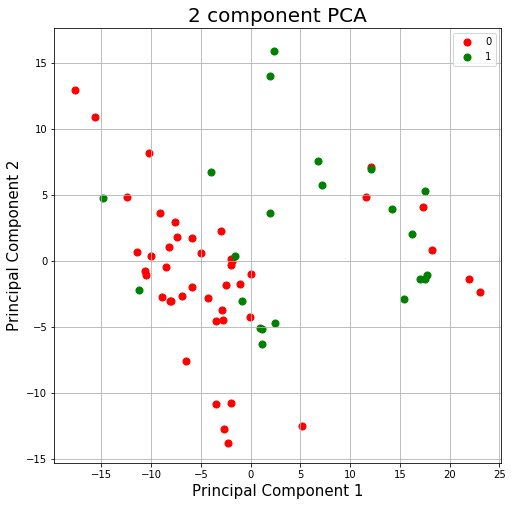

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['pelabelan'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [6]:
# Membagi data ke dalam  Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Proses Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Menjalankan algoritma PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance = pca.explained_variance_ratio_ # Proses pengecekan variance

# Proses pemilihan PCs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance2 = pca.explained_variance_ratio_

# Menjalankan algoritma logistic regression ke training set
from sklearn.linear_model import LogisticRegression
mesin_klasifikasi = LogisticRegression(random_state = 0)
mesin_klasifikasi.fit(X_train, y_train)

# Memprediksi test set berdasakan model logistic regression
y_pred = mesin_klasifikasi.predict(X_test)

# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


/home/rama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rama/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
cm


array([[7, 1],
       [2, 4]])

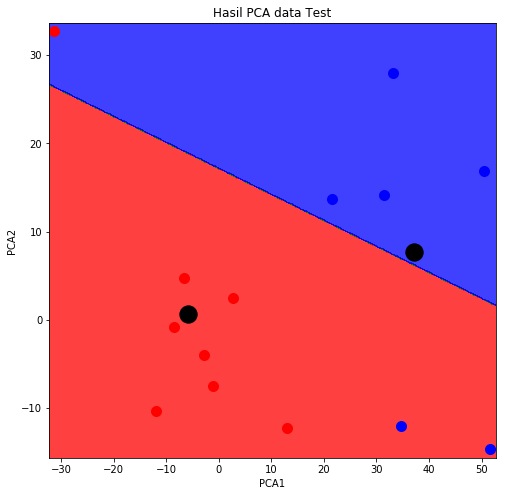

In [8]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (8,8))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_test)
#Visualisasi hasil clusters
plt.scatter(X_test[y_kmeans == 0, 0], X_test[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_kmeans == 1, 0], X_test[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X_test[y_kmeans == 2, 0], X_test[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Hasil PCA data Test')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()